<a href="https://colab.research.google.com/github/ricardojperez/DataAnalysis/blob/main/PrediccionSalario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan librerias a utilizar

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importacion del set de datos en formato csv.

In [10]:
df = pd.read_csv("Salary_dataset.csv",index_col=0)

In [11]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Se redondea el valor de los años de experiencia a un numero entero

In [19]:
YearsExperienceRound = df['YearsExperience'].round(0)

In [23]:
data = pd.concat([YearsExperienceRound,df["Salary"]],axis=1)
data

,YearsExperience,Salary
0,1.0,39344.0
1,1.0,46206.0
2,2.0,37732.0
3,2.0,43526.0
4,2.0,39892.0
5,3.0,56643.0
6,3.0,60151.0
7,3.0,54446.0
8,3.0,64446.0
9,4.0,57190.0


Se obtienen datos estadisticos sobre el Salario con la funcion describe()

In [24]:
data['Salary'].describe()

count        30.000000
mean      76004.000000
std       27414.429785
min       37732.000000
25%       56721.750000
50%       65238.000000
75%      100545.750000
max      122392.000000
Name: Salary, dtype: float64

Se Visualiza la distribucion de datos


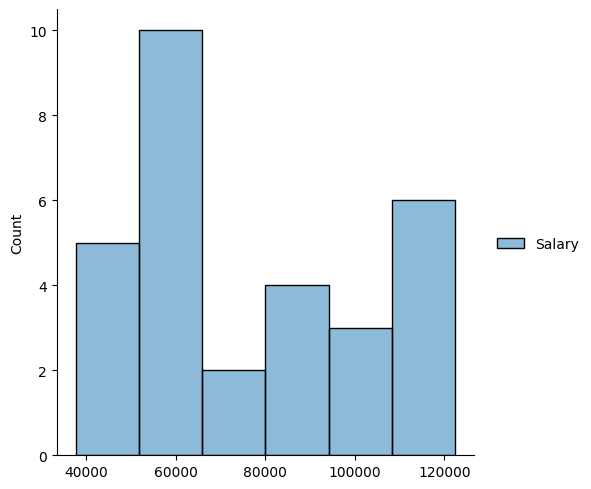

In [26]:
sns.displot([data['Salary']])

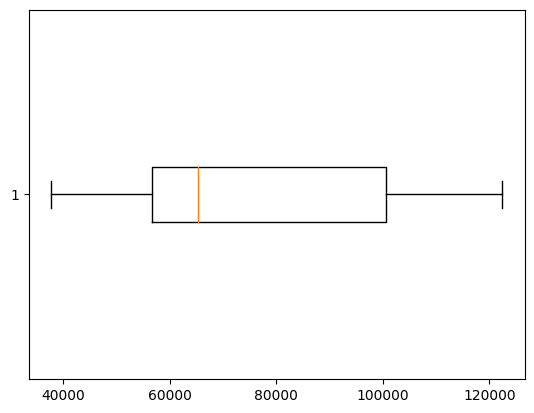

In [28]:
plt.boxplot(data['Salary'],vert=False)
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

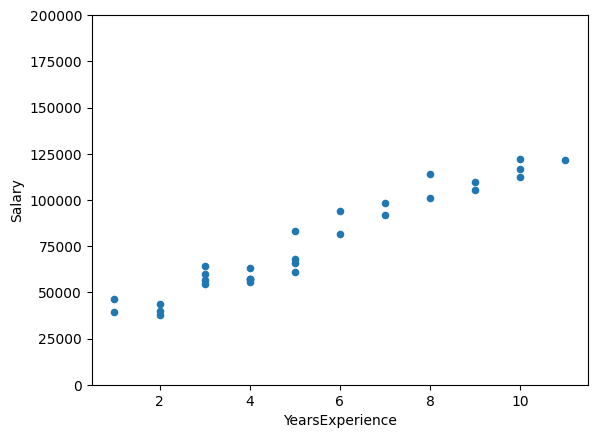

In [31]:
data.plot.scatter(x='YearsExperience', y='Salary', ylim=(0,200000))

Se observa un comportamiento lineal por lo que se usara el algoritmo de Regresión Lineal para predecir el Salario de un empleado en funcion a sus años de experiencia

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()

Se entrena el modelo de regresión lineal

In [34]:
lin_reg.fit(data['YearsExperience'].values.reshape(-1,1),data['Salary'])

LinearRegression()

In [35]:
lin_reg.intercept_

27139.945876636542

In [36]:
lin_reg.coef_

array([9105.1032528])

In [37]:
Xmin_max = np.array([[data["YearsExperience"].min()],[data["YearsExperience"].max()]])

In [38]:
y_train_pred= lin_reg.predict(Xmin_max)

Visualización de la prediccion que hizo el modelo


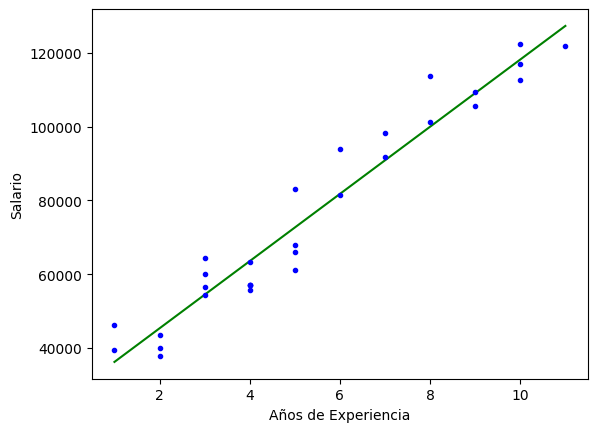

In [39]:
plt.plot(Xmin_max,y_train_pred,"g-")
plt.plot(data["YearsExperience"],data["Salary"],"b.")
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.show()

Se realizan predicciones para nuevos valores

In [40]:
x_new= np.array([[3]])

In [41]:
Salario= lin_reg.predict(x_new)
print("El Salario sera: ",int(Salario[0]))

El Salario sera:  54455


In [42]:
x_new= np.array([[10]])

In [43]:
Salario= lin_reg.predict(x_new)
print("El Salario sera: ",int(Salario[0]))

El Salario sera:  118190
